4th Homework

Exercise 4

a)

In [27]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt


Training_Set = sio.loadmat('Training_Set.mat')
X = Training_Set['X']
y = Training_Set['y']

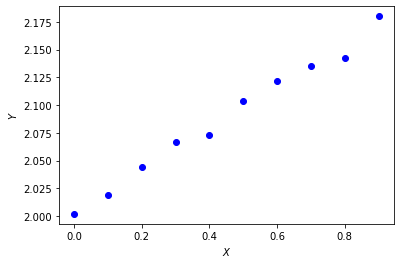

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X,y,c='b')
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
plt.show()

b)

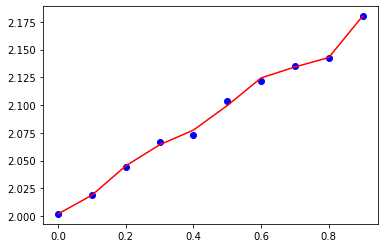

[2.00197922]
[0.25947824]
[-3.83267403]
[49.42088318]
[-262.20718384]
[698.30438232]
[-986.59069824]
[706.14349365]
[-201.45081139]


In [29]:
Xold=X
for i in range(2,9):
    X=np.hstack((X,Xold**i))

X=np.hstack((np.ones((10,1)),X))

XTX=np.dot(X.T,X)
XTXinv=np.linalg.inv(XTX)
XTy=np.dot(X.T,y)
theta=np.dot(XTXinv,XTy)

ynew=np.dot(X,theta)
plt.plot(Xold,y,'bo')
plt.plot(Xold,ynew,'r')
plt.show()

for i in range(len(theta)):
    print(theta[i])

c)

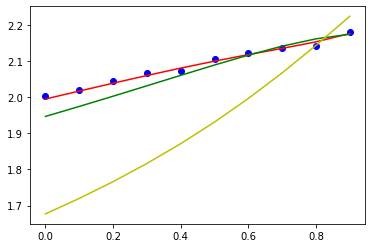

for lamda=0,01
[1.99471461]
[0.21909439]
[0.00406036]
[-0.03389617]
[-0.02809453]
[-0.01125288]
[0.00688224]
[0.02298818]
[0.03599]
for lamda=0,1
[1.94657363]
[0.27166295]
[0.04077954]
[-0.01282617]
[-0.02248477]
[-0.02009638]
[-0.0147972]
[-0.00943891]
[-0.00487436]
for lamda=1
[1.6771831]
[0.41167511]
[0.15549847]
[0.06257238]
[0.02254727]
[0.00368133]
[-0.00552871]
[-0.00995018]
[-0.0118701]


In [30]:
lamda1=0.01
XTXwithlamda=np.add(XTX,lamda1*np.identity(9))
XTXwithlamdainv=np.linalg.inv(XTXwithlamda)
theta1=np.dot(XTXwithlamdainv,XTy)

lamda2=0.1
XTXwithlamda=np.add(XTX,lamda2*np.identity(9))
XTXwithlamdainv=np.linalg.inv(XTXwithlamda)
theta2=np.dot(XTXwithlamdainv,XTy)

lamda3=1
XTXwithlamda=np.add(XTX,lamda3*np.identity(9))
XTXwithlamdainv=np.linalg.inv(XTXwithlamda)
theta3=np.dot(XTXwithlamdainv,XTy)

y1=np.dot(X,theta1)
y2=np.dot(X,theta2)
y3=np.dot(X,theta3)
plt.plot(Xold,y,'bo')
plt.plot(Xold,y1,'r')
plt.plot(Xold,y2, 'g')
plt.plot(Xold,y3, 'y')
plt.show()

print('for lamda=0,01')
for i in range(len(theta1)):
    print(theta1[i])
print('for lamda=0,1')
for i in range(len(theta2)):
    print(theta2[i])
print('for lamda=1')
for i in range(len(theta3)):
    print(theta3[i])

d)

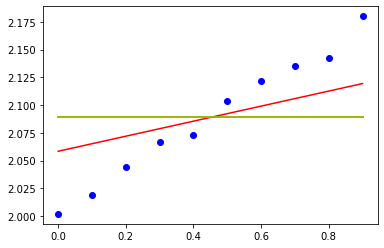

for lamda=0,01
2.05841216214922
0.06774234356098117
0.0
0.0
0.0
0.0
0.0
0.0
0.0
for lamda=0,1
2.0888962167516616
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
for lamda=1
2.0888962167516616
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [31]:
Xwithoutzeros=np.delete(X,0,1)

from sklearn import linear_model
clf1=linear_model.Lasso(alpha=0.01)
clf1.fit(Xwithoutzeros,y)
thetalasso1=clf1.intercept_
thetalasso1=np.append(thetalasso1,clf1.coef_)

clf2=linear_model.Lasso(alpha=0.1)
clf2.fit(Xwithoutzeros,y)
thetalasso2=clf2.intercept_
thetalasso2=np.append(thetalasso2,clf2.coef_)

clf3=linear_model.Lasso(alpha=1)
clf3.fit(Xwithoutzeros,y)
thetalasso3=clf3.intercept_
thetalasso3=np.append(thetalasso3,clf3.coef_)

ylasso1=np.dot(X,thetalasso1)
ylasso2=np.dot(X,thetalasso2)
ylasso3=np.dot(X,thetalasso3)
plt.plot(Xold,y,'bo')
plt.plot(Xold,ylasso1,'r')
plt.plot(Xold,ylasso2, 'g')
plt.plot(Xold,ylasso3, 'y')
plt.show()

print('for lamda=0,01')
for i in range(len(thetalasso1)):
    print(thetalasso1[i])
print('for lamda=0,1')
for i in range(len(thetalasso2)):
    print(thetalasso2[i])
print('for lamda=1')
for i in range(len(thetalasso3)):
    print(thetalasso3[i])

e)

By using the OLS, we obtain a specific value for theta for each value of X. The same applies for using the ridge solution. However, we observe that for lower values of lamda, the solutions fit better the sample. As lamda increases the model fits less the sample and the values of theta are getting closer to zero. Lastly, it can be observed that with Lasso, most of the coefficients of theta are getting the value of zero, especially as lamda is getting bigger. Again, a lower lamda fits the model better.

Exercise 5

In [49]:
import numpy as np
import matplotlib.pyplot as plt
X=[]
Y=[]

for i in range(50):
    x=np.random.uniform(0,10,30)
    
    y=2*x
    y=y+np.random.normal(0,8,30)
    
    X.append(x)
    Y.append(y)
    
X=np.array(X).T
Y=np.array(Y).T

In [50]:
theta_est_lamda=[]
for lamda in np.arange(0.0,10000.0,0.1):
    theta_est=[]
    for i in range(50):
        Xnew = np.array([X[:,i]]).T
        XTX=np.dot(Xnew.T, Xnew)
        XTXwithlamda=np.add(XTX,lamda*np.identity(1))
        XTXinv=np.linalg.inv(XTXwithlamda)
        XTy=np.dot(Xnew.T,Y[:,i])
        theta=np.dot(XTXinv,XTy)
        theta_est.append(theta)
    theta_est_lamda.append(theta_est)  

In [51]:
MSElamda=[]
for lamda in range(100000):
    t=0
    for i in range(50):
        t=t+(theta_est_lamda[lamda][i]-2)**2
    MSE=t/50
    MSElamda.append(MSE)

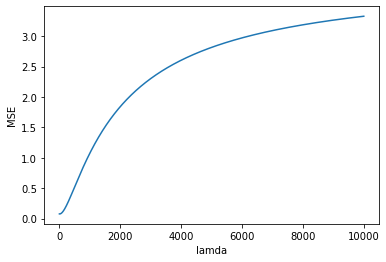

In [52]:
plt.plot(np.arange(0.0,10000.0,0.1),MSElamda)
plt.xlabel('lamda')
plt.ylabel('MSE')
plt.show()

In [53]:
lamdarange=[]
for lamda in range(100000):
    if MSElamda[0]>MSElamda[lamda]:
        lamdarange.append(lamda/10)

The range of lamda where MSE is smaller than that of the unbiased LS estimator is from lamda equal to  0.1 to lamda equal to  18.4


In [56]:
print('The range of lamda where MSE is smaller than that of the unbiased LS estimator is from lamda equal to ',lamdarange[0], 'to lamda equal to ', lamdarange[-1])
print('The smaller MSE has lamda equal to ', (np.argmin(MSElamda))/10,'and MSE equal to', min(MSElamda))

The range of lamda where MSE is smaller than that of the unbiased LS estimator is from lamda equal to  0.1 to lamda equal to  18.4
The smaller MSE has lamda equal to  9.1 and MSE equal to [0.07567753]


The smallest MSE of the biased estimator with this specific lamda, means that the estimates of theta are closer to theta0 than in all the other choices of lamda. Hence, the estimatiors may be biased, but in this specific range the theta estimators are closer to theta0.